# Credit Card Fraud

## The Dataset 

### Description

- This dataset includes 7 features from an unamed institution, the target variable is a binary, whether a transaction is fradulent or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cc_df = pd.read_csv("card_transdata.csv")

## Exploratory Data Analysis 

In [ ]:
#column names of the features we're working with 
for col in cc_df.columns:
    print(col)
    
print("Amount of data we're working with:", cc_df.shape[0])

distance_from_home
distance_from_last_transaction
ratio_to_median_purchase_price
repeat_retailer
used_chip
used_pin_number
online_order
fraud
Amount of data we're working with: 1000000


In [ ]:
#Checking for null values
print(cc_df.isnull().values.any())

False


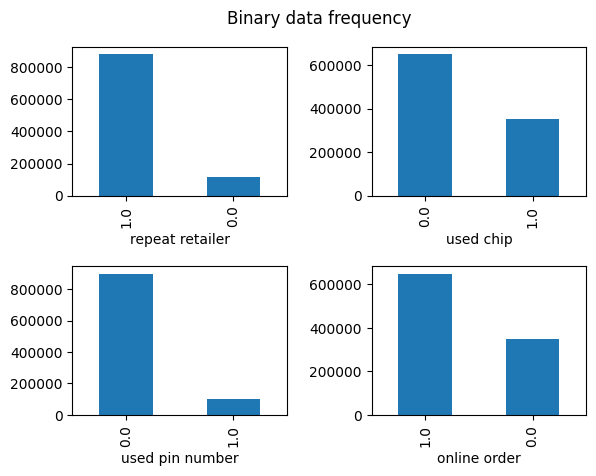

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=3.0)
fig.suptitle("Binary data frequency")
cc_df["repeat_retailer"].value_counts().plot.bar(ax=axes[0,0]).set_xlabel('repeat retailer')
cc_df["used_chip"].value_counts().plot.bar(ax=axes[0,1]).set_xlabel('used chip')
cc_df["used_pin_number"].value_counts().plot.bar(ax=axes[1,0]).set_xlabel('used pin number')
cc_df["online_order"].value_counts().plot.bar(ax=axes[1,1]).set_xlabel('online order')
plt.show()

- The 'used pin number' and 'repeat retailer' features have different proportional frequencies, in order to account for this stratified sampling can be used.

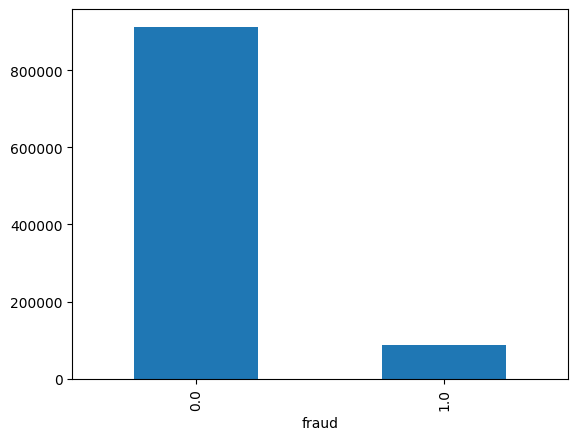

In [ ]:
cc_df["fraud"].value_counts().plot.bar().set_xlabel("fraud")
plt.show()

- The target variable also has a varying different proportion in terms of frequency, must be accounted for so the model does not only learn to detect for non-fradulent transactions.

In [ ]:
print(cc_df.distance_from_last_transaction.describe())

count    1000000.000000
mean           5.036519
std           25.843093
min            0.000118
25%            0.296671
50%            0.998650
75%            3.355748
max        11851.104565
Name: distance_from_last_transaction, dtype: float64


In [ ]:
print(cc_df.ratio_to_median_purchase_price.describe())

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64


In [ ]:
print(cc_df.distance_from_home.describe())

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64


- Much of the continuous features have extreme outliers, to account for these extreme values and not just cut them out, the log of this data will be taken to have a more binomial distribution as to not affect the model.

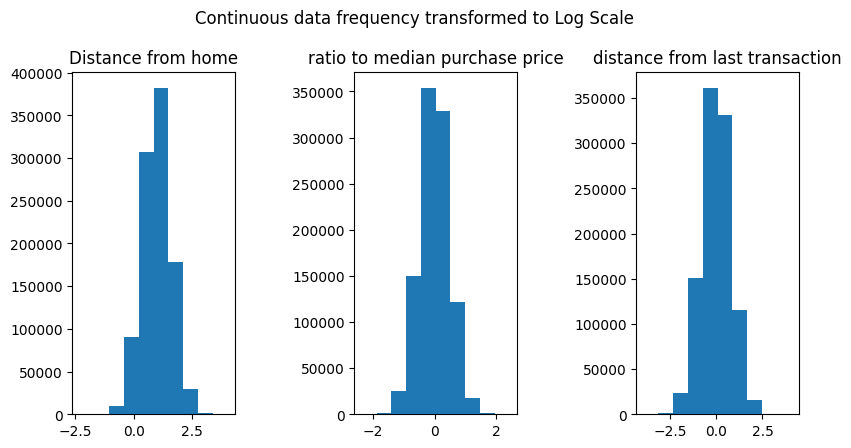

In [40]:
fig2, axes2 = plt.subplots(nrows=1, ncols=3)
fig2.tight_layout(pad=3.0)
fig2.suptitle("Continuous data frequency transformed to Log Scale", x = .65)
fig2.subplots_adjust(top=0.85, right = 1.25)
axes2[0].hist(np.log10(cc_df.distance_from_home))
axes2[0].set_title("Distance from home")
axes2[1].hist(np.log10(cc_df.ratio_to_median_purchase_price))
axes2[1].set_title("ratio to median purchase price")
axes2[2].hist(np.log10(cc_df.distance_from_last_transaction))
axes2[2].set_title("distance from last transaction")
plt.show()


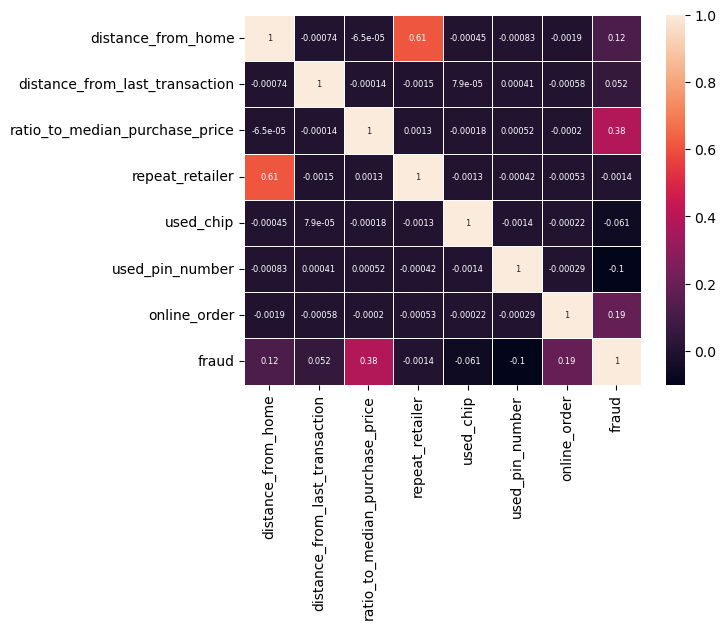

In [16]:
corr = cc_df.corr()
sns.heatmap(corr, linewidths = .4, annot=True,annot_kws={"fontsize":6})
plt.show()

- No highly correlated features, no multicollinearity issue.

### Transformation of data (preprocessing)

In [14]:
#log transformation to account for extreme outliers
cc_df['distance_from_home'] = np.log10(cc_df.distance_from_home)
cc_df['ratio_to_median_purchase_price'] = np.log10(cc_df.ratio_to_median_purchase_price)
cc_df['distance_from_last_transaction'] = np.log10(cc_df.distance_from_last_transaction)

In [17]:
#Here we're creating a 'stratified' column so we can stratify by multiple columns due to some binary data having 
#a greater proportion of one type vs another, clever hack.
cc_df['stratify'] = cc_df['fraud'].astype(str) + cc_df['repeat_retailer'].astype(str) + cc_df['used_pin_number'].astype(str)

## Modeling

### Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cc_df, test_size = 0.2, random_state = 0, stratify = cc_df['stratify'])

In [21]:
#splitting train into x and y train, splitting test into x and y test
train_X = train.drop(columns=['stratify', 'fraud'])
train_y = train['fraud']
test_X = test.drop(columns=['stratify', 'fraud'])
test_y = test['fraud']

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000,random_state=42)
logreg.fit(train_X, train_y)


LogisticRegression(max_iter=1000, random_state=42)

In [34]:
y_pred = logreg.predict(test_X)
score = accuracy_score(test_y, y_pred)
print("Accuracy:", score)

Accuracy: 0.94796


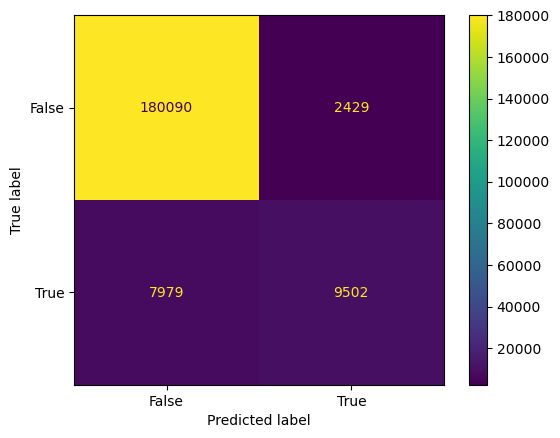

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, y_pred)
CM_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False, True] )
CM_display.plot()
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    182519
         1.0       0.80      0.54      0.65     17481

    accuracy                           0.95    200000
   macro avg       0.88      0.77      0.81    200000
weighted avg       0.94      0.95      0.94    200000



## KNN

C:\Users\me\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\me\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\me\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\me\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

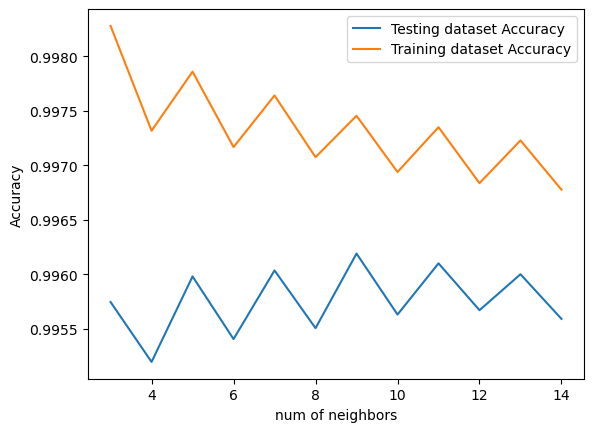

In [40]:
from sklearn.neighbors import KNeighborsClassifier

#look for optimal amount of neighbors 

num_neighbors = np.arange(3, 15)
train_accuracy_knn = np.empty(len(num_neighbors))
test_accuracy_knn = np.empty(len(num_neighbors))

for i, k in enumerate(num_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    train_accuracy_knn[i] = knn.score(train_X, train_y)
    test_accuracy_knn[i] = knn.score(test_X, test_y)

plt.plot(num_neighbors, test_accuracy_knn, label = "Testing dataset Accuracy")
plt.plot(num_neighbors, train_accuracy_knn, label = "Training dataset Accuracy")

plt.legend()
plt.xlabel("num of neighbors")
plt.ylabel("Accuracy")
plt.show()

- Seems like optimal amount of neighbors is 9 

In [41]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train_X, train_y)
print(knn.score(test_X, test_y))

C:\Users\me\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.99619


C:\Users\me\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


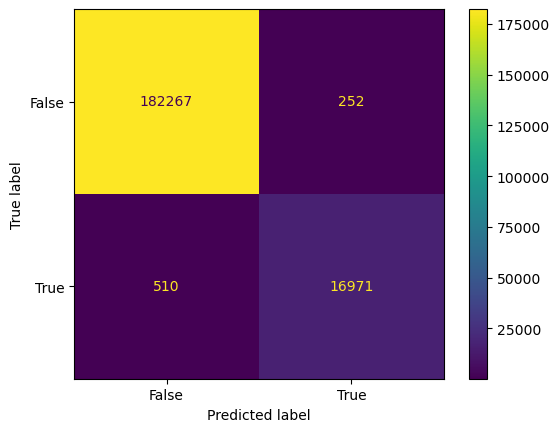

In [42]:
y_pred = knn.predict(test_X)
cm = confusion_matrix(test_y, y_pred)
CM_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False, True] )
CM_display.plot()
plt.show()

In [43]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      0.97      0.98     17481

    accuracy                           1.00    200000
   macro avg       0.99      0.98      0.99    200000
weighted avg       1.00      1.00      1.00    200000

